# Tests

This notebook collects basic plotting tests. 

In future, this might be moved to a different directory / formalized as unit tests. 

## Imports

In [1]:
from hicdash.constants import * 
from hicdash.definitions import *
from hicdash.utilities import *
from hicdash.readers import *
from hicdash.plotters import *
from hicdash.generator import *

## Read a Sample

Provide **full** paths (relative paths don't work at the moment) to each of the Arima-SV Pipeline output files (replace the below with your own -- the example data is not included with this repository). This particular example is quite old, so doesn't have the greatest quality.

In [2]:
sample = read_sample(
    "EXAMPLE", 
    "/home/wjmn/repos/hicdash/example_data/EXAMPLE_inter_30.hic",
    "/home/wjmn/repos/hicdash/example_data/EXAMPLE_v1.3_Arima_QC_deep.txt",
    "/home/wjmn/repos/hicdash/example_data/EXAMPLE.breaks.bedpe",
    )

# Gene Track

<Axes: >

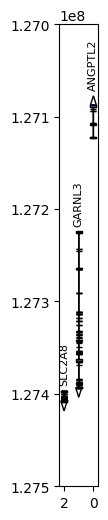

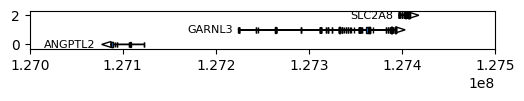

In [12]:
chr="chr9"
start=127000000
end=127500000

fig, ax = plt.subplots(figsize=(0.5, 6))
plot_gene_track(chr, start, end, ax=ax, hide_axes=False, centered_names=False, max_rows=3, min_rows=1, fontsize=8, vertical=True)


fig, ax = plt.subplots(figsize=(6, 0.5))
plot_gene_track(chr, start, end, ax=ax, hide_axes=False, centered_names=False, max_rows=3, min_rows=1, fontsize=8)

## Hi-C Centered Matrix

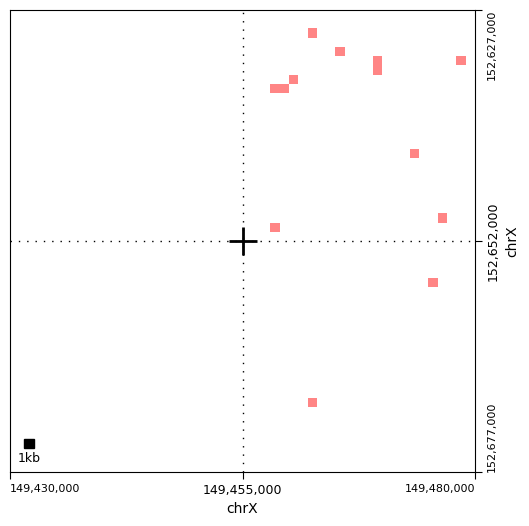

In [4]:
fig, ax = plt.subplots(figsize=(6,6))
call = sample.breakfinder_calls[-1]
chrA, posA = call.breakpointA.chr, call.breakpointA.pos 
chrB, posB = call.breakpointB.chr, call.breakpointB.pos
resolution = call.resolution
width = 25 * resolution

regionX = Region(chrA, posA-width, posA+width)
regionY = Region(chrB, posB-width, posB+width)
ax = plot_hic_region_matrix(sample, regionX, regionY, resolution, ax=ax, grid=False, crosshairs=True, minimal=False)


# ax = plot_hic_centered_matrix(sample, call.breakpointB.chr, call.breakpointB.pos, call.breakpointA.chr, call.breakpointA.pos, resolution, width, ax=ax, grid_lines=True)

# Get image data

## BigWig Track

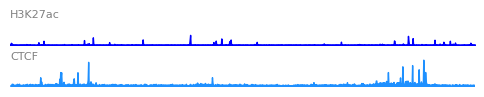

In [5]:
EXAMPLE_BW1 = "/home/wjmn/repos/hicdash/example_data/EXAMPLE.ctcf.bigwig"
EXAMPLE_BW2 = "/home/wjmn/repos/hicdash/example_data/EXAMPLE.h3k27ac.bigwig"

fig, ax = plt.subplots(2, 1, figsize=(6,1))
bw1 = pyBigWig.open(EXAMPLE_BW1)
bw2 = pyBigWig.open(EXAMPLE_BW2)
plot_bigwig_track(bw1, "chr2", 0, 4000000, ax=ax[0], label="H3K27ac")
plot_bigwig_track(bw2, "chr2", 0, 4000000, ax=ax[1], color="dodgerblue", label="CTCF")

## Generator Scenarios

In [6]:
# sample_id = "EXAMPLE"
# hic_filepath = "/home/wjmn/repos/hicdash/example_data/EXAMPLE_inter_30.hic"
# qc_filepath = "/home/wjmn/repos/hicdash/example_data/EXAMPLE_v1.3_Arima_QC_deep.txt"
# breakfinder_filepath = "/home/wjmn/repos/hicdash/example_data/EXAMPLE.breaks.bedpe"
# # breakfinder_filepath = "/home/wjmn/repos/hicdash/example_data/EXAMPLE.short.bedpe"
# extra_bedpe = "/home/wjmn/repos/hicdash/example_data/EXAMPLE.eaglec.bedpe"
# extra_bigwig = "/home/wjmn/repos/hicdash/example_data/EXAMPLE.h3k27ac.bigwig,/home/wjmn/repos/hicdash/example_data/EXAMPLE.ctcf.bigwig"
# control_filepath = "/home/wjmn/repos/hicdash/example_data/COMPARISON_inter_30.hic"
# output_filepath = "/home/wjmn/repos/hicdash/example_data/EXAMPLE_report.html"
# crosshairs=True
# grid=True

# make_html_report_and_save(
#     sample_id=sample_id,
#     hic_filepath=hic_filepath,
#     qc_filepath=qc_filepath,
#     breakfinder_filepath=breakfinder_filepath,
#     extra_bedpe=extra_bedpe, 
#     extra_bigwig=extra_bigwig,
#     crosshairs=crosshairs,
#     grid=grid,
#     control_filepath=control_filepath,
#     output_filepath=output_filepath
# )